# MEPS Healthcare Costs and Patient Satisfaction Analysis
Author: Mohd Arqam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv(r"./Research Work/Health_Insurance_Data_New.csv")

##we can check the shape of our data set, the output confirm that our data has 400 obs. with 25 characters
print('Confirming our data obs', df.shape)
## we as well have a view of our data
df.head()
##Then explore on features//our data contains float64/object
df.dtypes

Confirming our data obs (137545, 52)


YEAR              int64
PERNUM            int64
DUID              int64
PID               int64
MEPSID            int64
PANEL             int64
PSUANN            int64
STRATANN          int64
PSUPLD            int64
STRATAPLD         int64
PANELYR           int64
RELYR             int64
PERWEIGHT       float64
SAQWEIGHT       float64
DIABWEIGHT      float64
FAMIDYR          object
CPSFAMID         object
AGE               int64
SEX               int64
MARSTAT           int64
BIRTHMO           int64
BIRTHYR           int64
REGIONMEPS        int64
RELATE            int64
FAMSIZE           int64
INCTOT          float64
FTOTVAL           int64
FOODSTMO          int64
POVCAT            int64
POVCATCPS         int64
POVCATMEPS        int64
HEALTH            int64
HINOTCOV          int64
HIPRIVATE         int64
HICHAMPANY        int64
HIMACHIP          int64
HIMCARE           int64
HIOTHGOV          int64
HIOTHGOVHMO       int64
HIOTHGOVPREM      int64
HIVA              int64
COVERTYPE       

In [2]:
print(f"The Column Names are: \n {df.columns}")

The Column Names are: 
 Index(['YEAR', 'PERNUM', 'DUID', 'PID', 'MEPSID', 'PANEL', 'PSUANN',
       'STRATANN', 'PSUPLD', 'STRATAPLD', 'PANELYR', 'RELYR', 'PERWEIGHT',
       'SAQWEIGHT', 'DIABWEIGHT', 'FAMIDYR', 'CPSFAMID', 'AGE', 'SEX',
       'MARSTAT', 'BIRTHMO', 'BIRTHYR', 'REGIONMEPS', 'RELATE', 'FAMSIZE',
       'INCTOT', 'FTOTVAL', 'FOODSTMO', 'POVCAT', 'POVCATCPS', 'POVCATMEPS',
       'HEALTH', 'HINOTCOV', 'HIPRIVATE', 'HICHAMPANY', 'HIMACHIP', 'HIMCARE',
       'HIOTHGOV', 'HIOTHGOVHMO', 'HIOTHGOVPREM', 'HIVA', 'COVERTYPE',
       'COVTYPEAGE', 'CANCEREV', 'CHOLHIGHEV', 'DIABETICEV', 'HEARTCONEV',
       'HYPERTENAGE', 'EXPTOT', 'CHGTOT', 'OPEXPTOT', 'OPCHGTOT'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137545 entries, 0 to 137544
Data columns (total 52 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          137545 non-null  int64  
 1   PERNUM        137545 non-null  int64  
 2   DUID          137545 non-null  int64  
 3   PID           137545 non-null  int64  
 4   MEPSID        137545 non-null  int64  
 5   PANEL         137545 non-null  int64  
 6   PSUANN        137545 non-null  int64  
 7   STRATANN      137545 non-null  int64  
 8   PSUPLD        137545 non-null  int64  
 9   STRATAPLD     137545 non-null  int64  
 10  PANELYR       137545 non-null  int64  
 11  RELYR         137545 non-null  int64  
 12  PERWEIGHT     137545 non-null  float64
 13  SAQWEIGHT     137545 non-null  float64
 14  DIABWEIGHT    137545 non-null  float64
 15  FAMIDYR       137545 non-null  object 
 16  CPSFAMID      137545 non-null  object 
 17  AGE           137545 non-null  int64  
 18  SEX 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,137545.0,2.019882e+03,1.391962e+00,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
PERNUM,137545.0,2.109084e+00,1.358845e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
DUID,137545.0,2.459865e+06,1.562332e+05,2.290001e+06,2.324150e+06,2.462081e+06,2.573954e+06,2.799700e+06
PID,137545.0,1.038047e+02,1.475577e+01,1.010000e+02,1.010000e+02,1.020000e+02,1.030000e+02,5.030000e+02
MEPSID,137545.0,2.459866e+09,1.562332e+08,2.290001e+09,2.324150e+09,2.462081e+09,2.573954e+09,2.799700e+09
PANEL,137545.0,2.399644e+01,1.409536e+00,2.200000e+01,2.300000e+01,2.400000e+01,2.500000e+01,2.700000e+01
PSUANN,137545.0,1.899749e+00,9.703953e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
STRATANN,137545.0,2.020088e+07,1.391911e+04,2.018200e+07,2.019201e+07,2.020204e+07,2.021206e+07,2.022212e+07
PSUPLD,137545.0,1.856251e+00,9.312109e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
STRATAPLD,137545.0,2.056470e+03,3.405201e+01,2.001000e+03,2.027000e+03,2.055000e+03,2.087000e+03,2.117000e+03


In [5]:
# View basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137545 entries, 0 to 137544
Data columns (total 52 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          137545 non-null  int64  
 1   PERNUM        137545 non-null  int64  
 2   DUID          137545 non-null  int64  
 3   PID           137545 non-null  int64  
 4   MEPSID        137545 non-null  int64  
 5   PANEL         137545 non-null  int64  
 6   PSUANN        137545 non-null  int64  
 7   STRATANN      137545 non-null  int64  
 8   PSUPLD        137545 non-null  int64  
 9   STRATAPLD     137545 non-null  int64  
 10  PANELYR       137545 non-null  int64  
 11  RELYR         137545 non-null  int64  
 12  PERWEIGHT     137545 non-null  float64
 13  SAQWEIGHT     137545 non-null  float64
 14  DIABWEIGHT    137545 non-null  float64
 15  FAMIDYR       137545 non-null  object 
 16  CPSFAMID      137545 non-null  object 
 17  AGE           137545 non-null  int64  
 18  SEX 

,YEAR,PERNUM,DUID,PID,MEPSID,PANEL,PSUANN,STRATANN,PSUPLD,STRATAPLD,...,COVTYPEAGE,CANCEREV,CHOLHIGHEV,DIABETICEV,HEARTCONEV,HYPERTENAGE,EXPTOT,CHGTOT,OPEXPTOT,OPCHGTOT
count,137545.000000,137545.000000,1.375450e+05,137545.000000,1.375450e+05,137545.000000,137545.000000,1.375450e+05,137545.000000,137545.000000,...,137545.000000,137545.000000,137545.000000,137545.000000,137545.000000,137545.000000,1.375450e+05,1.375450e+05,137545.000000,1.375450e+05
mean,2019.881959,2.109084,2.459865e+06,103.804653,2.459866e+09,23.996445,1.899749,2.020088e+07,1.856251,2056.469737,...,21.865964,0.906329,1.074107,1.112574,0.901145,82.842997,6.823318e+03,1.455851e+04,748.584311,2.694792e+03
std,1.391962,1.358845,1.562332e+05,14.755769,1.562332e+08,1.409536,0.970395,1.391911e+04,0.931211,34.052015,...,15.423780,0.716388,0.851624,0.414442,0.709749,23.015106,2.180987e+04,6.591901e+04,5942.536601,2.471428e+04
min,2018.000000,1.000000,2.290001e+06,101.000000,2.290001e+09,22.000000,1.000000,2.018200e+07,1.000000,2001.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2019.000000,1.000000,2.324150e+06,101.000000,2.324150e+09,23.000000,1.000000,2.019201e+07,1.000000,2027.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,68.000000,2.130000e+02,2.700000e+02,0.000000,0.000000e+00
50%,2020.000000,2.000000,2.462081e+06,102.000000,2.462081e+09,24.000000,2.000000,2.020204e+07,2.000000,2055.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,96.000000,1.305000e+03,1.748000e+03,0.000000,0.000000e+00
75%,2021.000000,3.000000,2.573954e+06,103.000000,2.573954e+09,25.000000,2.000000,2.021206e+07,2.000000,2087.000000,...,30.000000,1.000000,2.000000,1.000000,1.000000,96.000000,5.391000e+03,8.001000e+03,0.000000,0.000000e+00
max,2022.000000,16.000000,2.799700e+06,503.000000,2.799700e+09,27.000000,8.000000,2.022212e+07,8.000000,2117.000000,...,72.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.187290e+06,9.686967e+06,811744.000000,5.789701e+06


#### removing Negative value of the total family income
#### making new_age column by subtracting birthyear from Year

In [6]:
df = df[df['FTOTVAL'] >= 0]
df = df[df['INCTOT'] >=0]
df = df[df['HEALTH'] != 8]
df = df[df['HEALTH'] != 0]

df['new_age'] = df['YEAR'] - df['BIRTHYR'] # calculating actual age


In [7]:
min(df['new_age']), max(df['new_age'])

(-7980, 85)

min value is due to error in the birth year column

In [8]:
df[df['new_age'] == df['new_age'].min()]

,YEAR,PERNUM,DUID,PID,MEPSID,PANEL,PSUANN,STRATANN,PSUPLD,STRATAPLD,...,CANCEREV,CHOLHIGHEV,DIABETICEV,HEARTCONEV,HYPERTENAGE,EXPTOT,CHGTOT,OPEXPTOT,OPCHGTOT,new_age
16046,2018,2,2320699,102,2320699102,23,1,20182077,1,2077,...,1,1,2,1,96,0,0,0,0,-7980
21653,2018,2,2324254,106,2324254106,23,2,20182004,2,2004,...,1,2,2,2,99,56092,488519,0,0,-7980


In [9]:
df.loc[df['new_age'] < 0, 'new_age'] = df.loc[df['new_age'] < 0, 'AGE']

In [10]:
min(df['new_age']), max(df['new_age'])
# we will drop the AGE column since we have calculated the ages from the birth year column
df = df.drop('AGE',axis =1)

In [11]:
df.head()

,YEAR,PERNUM,DUID,PID,MEPSID,PANEL,PSUANN,STRATANN,PSUPLD,STRATAPLD,...,CANCEREV,CHOLHIGHEV,DIABETICEV,HEARTCONEV,HYPERTENAGE,EXPTOT,CHGTOT,OPEXPTOT,OPCHGTOT,new_age
0,2018,1,2290001,101,2290001101,22,1,20182035,1,2035,...,1,1,1,1,96,2368,1706,0,0,27
1,2018,2,2290001,102,2290001102,22,1,20182035,1,2035,...,1,1,1,1,96,2040,926,0,0,25
2,2018,1,2290002,101,2290002101,22,2,20182048,2,2048,...,1,1,1,1,96,173,262,0,0,34
3,2018,2,2290002,102,2290002102,22,2,20182048,2,2048,...,1,1,1,1,96,0,0,0,0,39
8,2018,1,2290003,101,2290003101,22,2,20182002,2,2002,...,1,1,1,1,96,535,894,0,0,36


In [12]:
from scipy import stats

def remove_outliers_zscore_multi(df, columns, threshold=3):
    """
    Remove outliers from multiple columns in a DataFrame using the Z-score method.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to clean
        threshold (float): Z-score threshold (default is 3)
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed for the specified columns
    """
    df_cleaned = df.copy()
    
    for col in columns:
        if col not in df_cleaned.columns:
            print(f"Warning: Column '{col}' not found. Skipping.")
            continue
        
        # Ensure the column is numeric
        data = df_cleaned[col].astype(float)
        
        # Compute Z-scores
        z_scores = stats.zscore(data, nan_policy='omit')  # handle NaNs gracefully
        
        # Filter based on Z-score threshold
        mask = np.abs(z_scores) <= threshold
        original_len = len(df_cleaned)
        df_cleaned = df_cleaned[mask]
        removed = original_len - len(df_cleaned)
        
        print(f"Removed {removed} outliers from '{col}' (Z > {threshold})")
    
    return df_cleaned


In [13]:
cleaned_df = remove_outliers_zscore_multi(df, ['EXPTOT', 'CHGTOT','OPEXPTOT','OPCHGTOT'], threshold=3)

Removed 1039 outliers from 'EXPTOT' (Z > 3)
Removed 1483 outliers from 'CHGTOT' (Z > 3)
Removed 1272 outliers from 'OPEXPTOT' (Z > 3)
Removed 1571 outliers from 'OPCHGTOT' (Z > 3)


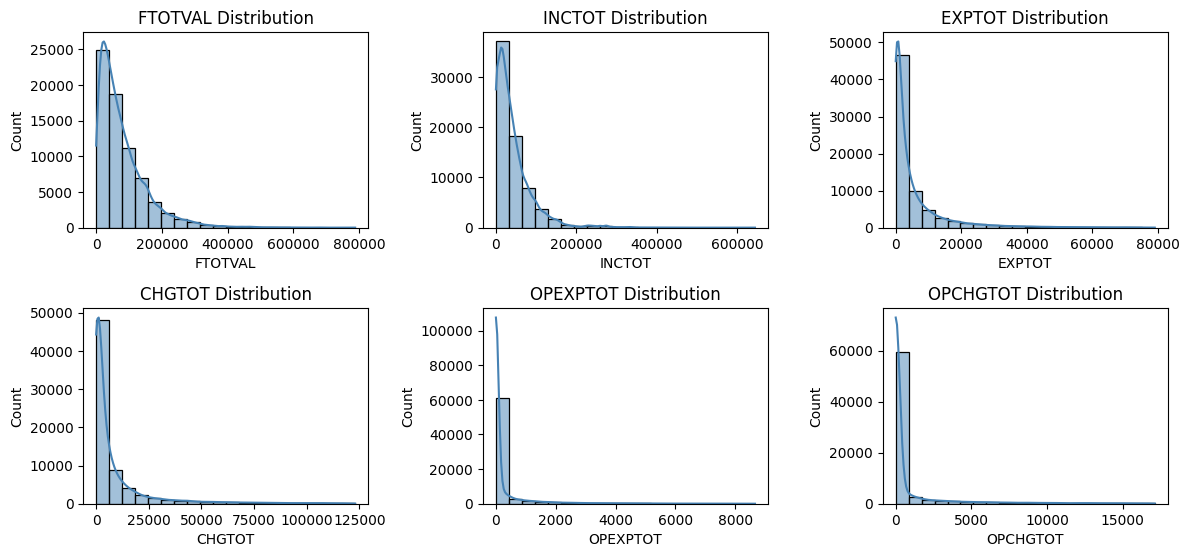

In [14]:
    numerical_cols = [
        'FTOTVAL',    # Family income
        'INCTOT',     # Individual income
        'EXPTOT',     # Total healthcare expenditure
        'CHGTOT', # Total healthcare charges
        'OPEXPTOT',
        'OPCHGTOT'
    ]
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 3, i)
        sns.histplot(cleaned_df[col], kde=True, bins=20, color='steelblue')
        plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\4219163215.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = cleaned_df.pivot_table(index='HEALTH_LABEL', columns='CHGTOT_bin', values='CHGTOT', aggfunc='count', fill_value=0)


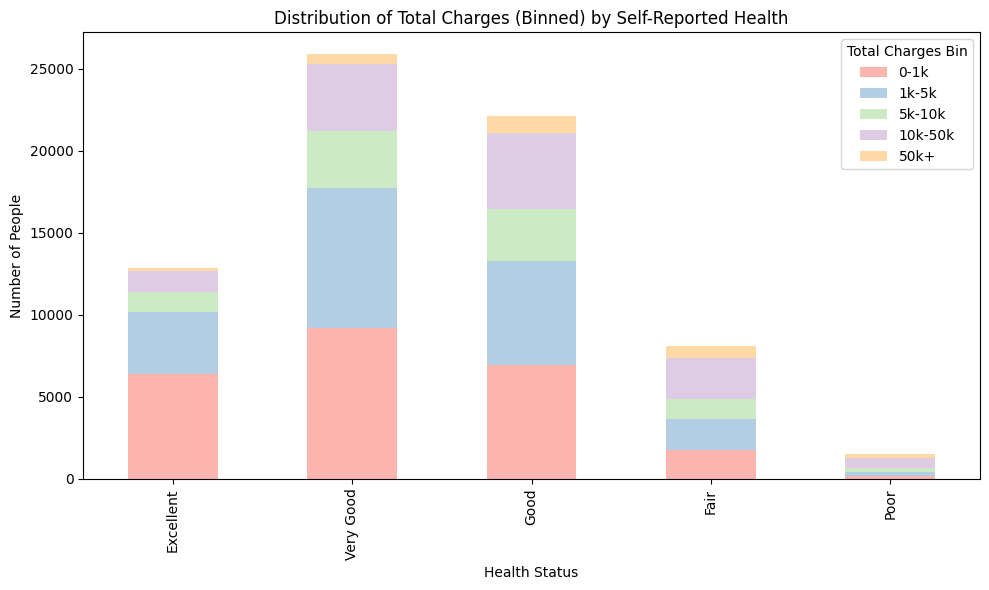

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric health ratings to labels
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Ensure health labels are ordered
health_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]
cleaned_df['HEALTH_LABEL'] = pd.Categorical(cleaned_df['HEALTH_LABEL'], categories=health_order, ordered=True)

# 1. Create bins for CHGTOT
bins = [0, 1000, 5000, 10000, 50000, cleaned_df['CHGTOT'].max()]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k+']
cleaned_df['CHGTOT_bin'] = pd.cut(cleaned_df['CHGTOT'], bins=bins, labels=labels, include_lowest=True)

# 2. Pivot table: count of people in each charge bin by health label
pivot = cleaned_df.pivot_table(index='HEALTH_LABEL', columns='CHGTOT_bin', values='CHGTOT', aggfunc='count', fill_value=0)

# 3. Plot as stacked bar chart
colors = sns.color_palette("Pastel1", len(labels))
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Final touches
plt.xlabel('Health Status')
plt.ylabel('Number of People')
plt.title('Distribution of Total Charges (Binned) by Self-Reported Health')
plt.legend(title='Total Charges Bin')
plt.tight_layout()
plt.show()


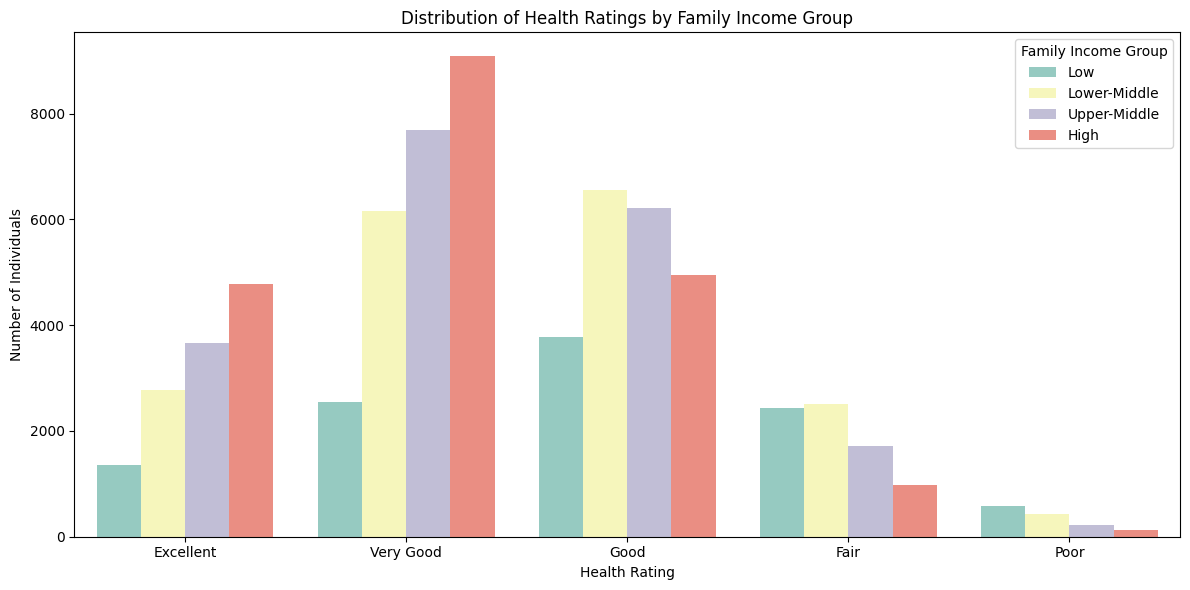

In [16]:

# Health label mapping
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}

# Create a new column with health labels
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Define ordered categories
health_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]
cleaned_df['HEALTH_LABEL'] = pd.Categorical(cleaned_df['HEALTH_LABEL'], categories=health_order, ordered=True)

# Create family income groups
cleaned_df['FAMILY_INCOME_GROUP'] = pd.cut(
    cleaned_df['FTOTVAL'],
    bins=[0, 20000, 50000, 100000, cleaned_df['FTOTVAL'].max()],
    labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High']
)

# Plot with ordered x-axis
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_df, x='HEALTH_LABEL', hue='FAMILY_INCOME_GROUP', palette='Set3')
plt.title('Distribution of Health Ratings by Family Income Group')
plt.xlabel('Health Rating')
plt.ylabel('Number of Individuals')
plt.legend(title='Family Income Group')
plt.tight_layout()
plt.show()


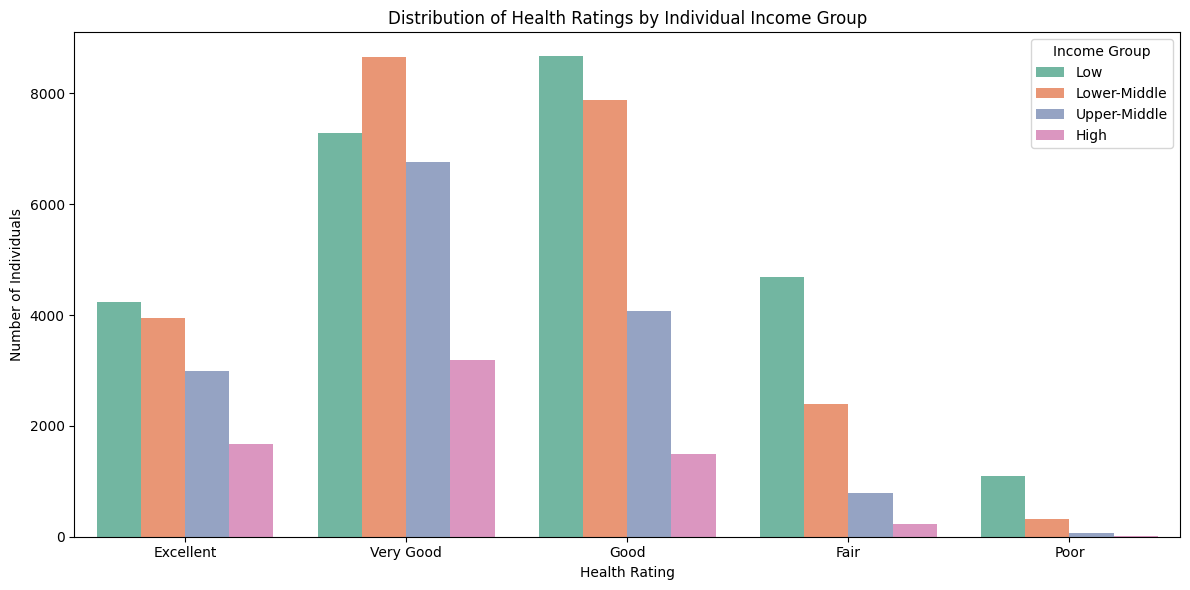

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Map numeric health to labels
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Order health categories
health_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]
cleaned_df['HEALTH_LABEL'] = pd.Categorical(cleaned_df['HEALTH_LABEL'], categories=health_order, ordered=True)

# Create income group bins
cleaned_df['INCOME_GROUP'] = pd.cut(
    cleaned_df['INCTOT'],
    bins=[-1, 20000, 50000, 100000, cleaned_df['INCTOT'].max()],
    labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High']
)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_df, x='HEALTH_LABEL', hue='INCOME_GROUP', palette='Set2')

plt.title('Distribution of Health Ratings by Individual Income Group')
plt.xlabel('Health Rating')
plt.ylabel('Number of Individuals')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()


#### Visualizing Health Score based on Gender

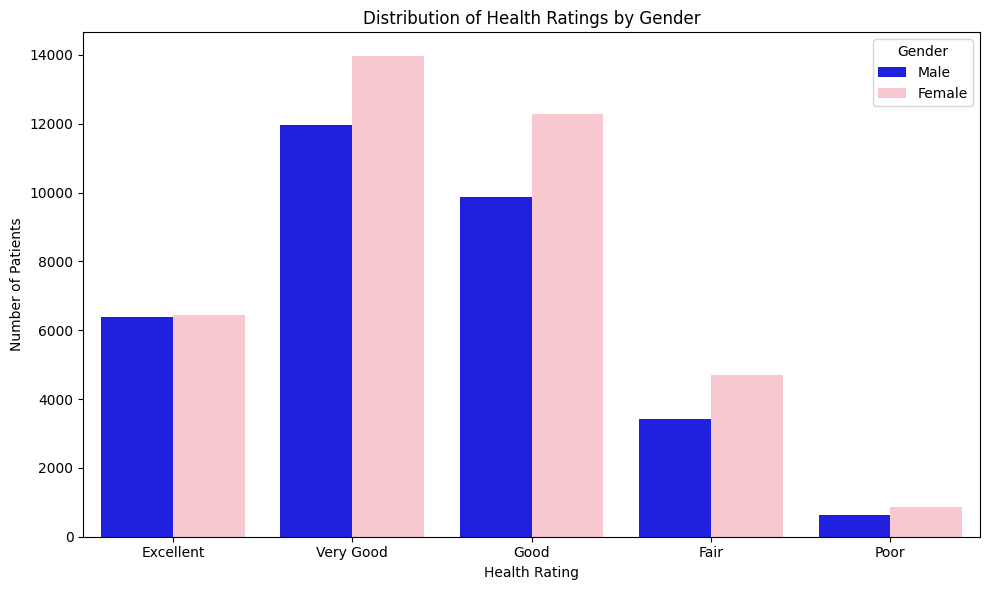

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Map health scores to labels
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Ensure health labels are in correct order
health_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]
cleaned_df['HEALTH_LABEL'] = pd.Categorical(cleaned_df['HEALTH_LABEL'], categories=health_order, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x='HEALTH_LABEL', hue='SEX', palette={1: 'blue', 2: 'pink'})

plt.title('Distribution of Health Ratings by Gender')
plt.xlabel('Health Rating')
plt.ylabel('Number of Patients')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()


## Feature Engineering

In [19]:
def insurance_type(row):
    if row['HINOTCOV'] == 2:
        return 'Uninsured'
    private = row['HIPRIVATE'] == 2
    public = row['HIMCARE'] == 2 or row['HIMACHIP'] == 2

    if private and public:
        return 'Mixed'
    elif private or row['COVERTYPE'] == 1:
        return 'Private Only'
    elif public or row['COVERTYPE'] == 2:
        return 'Public Only'
    else:
        return 'Other/Unknown'

cleaned_df['INSURANCE_TYPE'] = cleaned_df.apply(insurance_type, axis=1)

In [20]:
cleaned_df['INSURANCE_TYPE'].value_counts()

INSURANCE_TYPE
Private Only    33423
Public Only     21027
Mixed           10202
Uninsured        5826
Name: count, dtype: int64

In [21]:
cleaned_df.shape

(70478, 57)

C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\1987875694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges_by_type.index, y=charges_by_type.values, palette="muted")


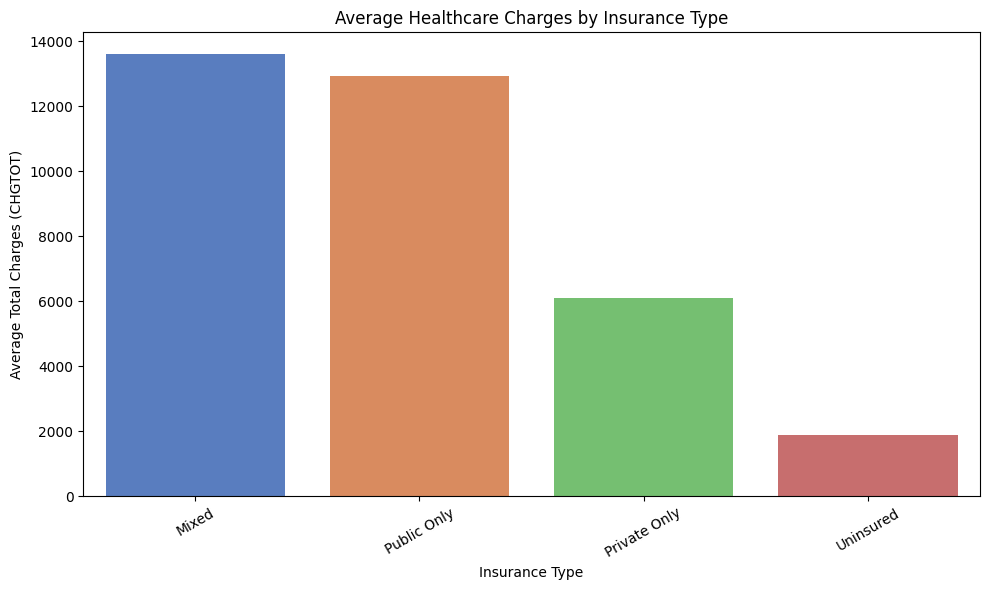

In [22]:
# Group by insurance type and calculate mean charges
charges_by_type = cleaned_df.groupby('INSURANCE_TYPE')['CHGTOT'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=charges_by_type.index, y=charges_by_type.values, palette="muted")
plt.ylabel("Average Total Charges (CHGTOT)")
plt.xlabel("Insurance Type")
plt.title("Average Healthcare Charges by Insurance Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\3733484962.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_grouped = cleaned_df.groupby(['INSURANCE_TYPE', 'AGE_GROUP'])['CHGTOT'].mean().reset_index()


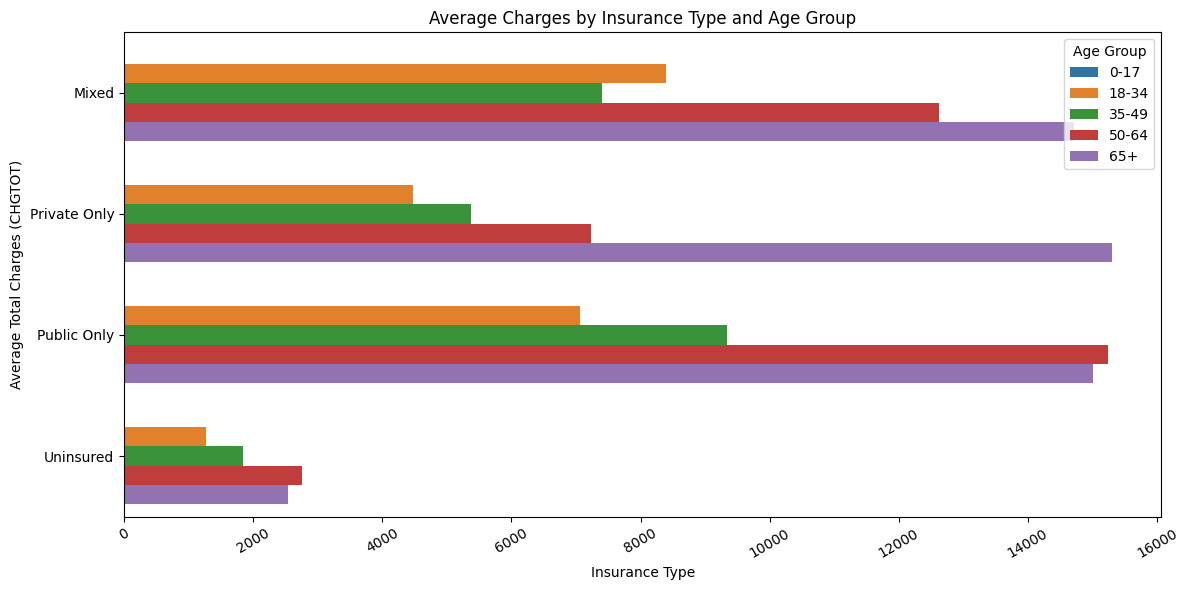

In [23]:
# Create AGE_GROUP
cleaned_df['AGE_GROUP'] = pd.cut(
    cleaned_df['new_age'],
    bins=[0, 17, 34, 49, 64, 120],
    labels=["0-17", "18-34", "35-49", "50-64", "65+"]
)

# Group by Insurance Type and Age Group, then get average CHGTOT
charges_grouped = cleaned_df.groupby(['INSURANCE_TYPE', 'AGE_GROUP'])['CHGTOT'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=charges_grouped, y='INSURANCE_TYPE', x='CHGTOT', hue='AGE_GROUP', orient='h' )
plt.ylabel("Average Total Charges (CHGTOT)")
plt.xlabel("Insurance Type")
plt.title("Average Charges by Insurance Type and Age Group")
plt.xticks(rotation=30)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

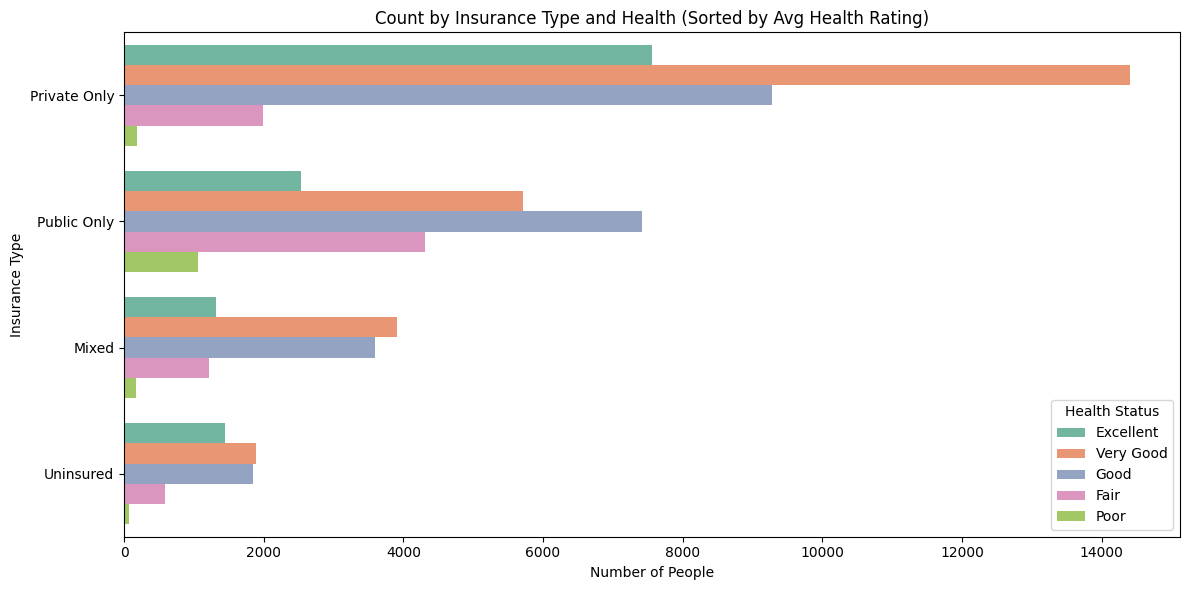

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric health to readable labels
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Count number of people by Insurance Type and Health
count_data = cleaned_df.groupby(['INSURANCE_TYPE', 'HEALTH_LABEL']).size().reset_index(name='Count')

# Compute average numeric HEALTH per insurance type for sorting
health_avg = cleaned_df.groupby('INSURANCE_TYPE')['HEALTH'].count().sort_values(ascending=False).index.tolist()

# Set the desired order for the hue (health labels)
hue_order = ["Excellent", "Very Good", "Good", "Fair", "Poor"]

# Plot bar chart with sorted INSURANCE_TYPE and fixed hue order
plt.figure(figsize=(12, 6))
sns.barplot(
    data=count_data,
    y='INSURANCE_TYPE',
    x='Count',
    hue='HEALTH_LABEL',
    order=health_avg,
    hue_order=hue_order,      
    palette="Set2",
    orient='h'
)
plt.ylabel("Insurance Type")
plt.xlabel("Number of People")
plt.title("Count by Insurance Type and Health (Sorted by Avg Health Rating)")
plt.legend(title="Health Status")
plt.tight_layout()
plt.show()

What Does POVCATCPS_1 = 1, 2, or 3 Mean?
POVCATCPS_1 is a variable that categorizes a family’s income as a percentage of the federal poverty line, using the U.S. Census Bureau’s Current Population Survey (CPS) family definition.

Value 1: Family income is less than 50% of the poverty line (extreme poverty).
Value 2: Family income is 50% to 74% of the poverty line (very poor).
Value 3: Family income is 75% to 99% of the poverty line (just below the poverty line).
In all three cases, the family’s income is below 100% of the federal poverty threshold.

In [25]:
# IS_POVERTY: 1 if in poverty, 0 if not
cleaned_df['IS_POVERTY'] = cleaned_df['POVCATCPS'].isin([1, 2, 3]).astype(int)

In [26]:
cleaned_df['IS_POVERTY']

0         0
1         0
2         0
3         0
8         0
         ..
137539    0
137540    0
137541    0
137542    0
137544    1
Name: IS_POVERTY, Length: 70478, dtype: int64

In [27]:
cleaned_df['UNPAID_CHARGES'] = cleaned_df['CHGTOT'] - cleaned_df['EXPTOT']

In [28]:
trend = cleaned_df.groupby('IS_POVERTY')['UNPAID_CHARGES'].mean().reset_index()
trend['POVERTY_LABEL'] = trend['IS_POVERTY'].map({0: 'Not in Poverty', 1: 'In Poverty'})

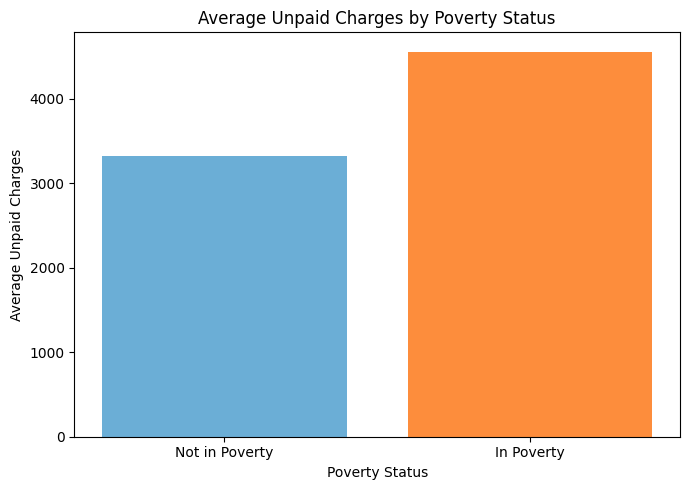

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(trend['POVERTY_LABEL'], trend['UNPAID_CHARGES'], color=['#6baed6', '#fd8d3c'])
plt.ylabel('Average Unpaid Charges')
plt.xlabel('Poverty Status')
plt.title('Average Unpaid Charges by Poverty Status')
plt.tight_layout()
plt.show()

<article> 
Calculation Logic: U.S. Federal Poverty Guidelines
1. Gather Required Dat
2. 
Family Size: Number of people in the family/household (adults + children
3. .
Family Income: Total annual family income (before taxes4.
2. Obtain the Federal Poverty Thres
   hold
The U.S. government publishes a table each year with the poverty threshold for each family size.
For example, in 2024 (contiguous U.S.):
1 person: $15,060
2 people: $20,440
3 people: $25,820
4 people: $31,200
For each additional person, 6dd $5,380
3. Calculate the Poverty Ratio
Poverty Ratio
=
Family Income
Poverty Threshold for Family Size
Poverty Ratio= 
Poverty Threshold for Family Size
7Family Income
​ 
4. Determine Poverty Status
If Poverty Ratio < 1.0: The family is in poverty.
If Poverty Ratio ≥ 1.0: The family is not in poverty.
Example Calculation
Suppose:

Family size = 4
Family income = $28,000
2024 poverty threshold for 4 = $31,200
Poverty Ratio
=
28
,
000
31
,
200
≈
0.90
Poverty Ratio= 
31,200
28,000
​
 ≈0.90
Result:

0.90 < 1.0 → This family is in poverty.
</article>

In [30]:
# HEALTH is coded 1=Excellent, 5=Poor
health_labels = {
    1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"
}
cleaned_df['HEALTH_LABEL'] = cleaned_df['HEALTH'].map(health_labels)

# Group by health and poverty, calculate mean unpaid charges
trend = (
    cleaned_df
    .groupby(['HEALTH_LABEL', 'IS_POVERTY'])['UNPAID_CHARGES']
    .mean()
    .reset_index()
)

# Add readable poverty label
trend['POVERTY_LABEL'] = trend['IS_POVERTY'].map({0: 'Not in Poverty', 1: 'In Poverty'})

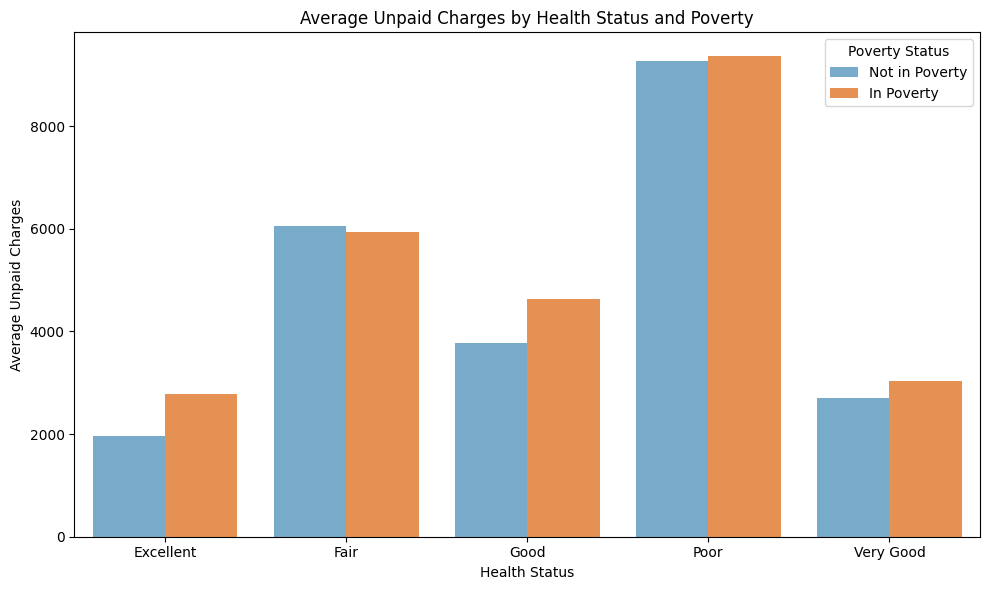

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=trend,
    x='HEALTH_LABEL',
    y='UNPAID_CHARGES',
    hue='POVERTY_LABEL',
    palette=['#6baed6', '#fd8d3c']
)
plt.ylabel('Average Unpaid Charges')
plt.xlabel('Health Status')
plt.title('Average Unpaid Charges by Health Status and Poverty')
plt.legend(title='Poverty Status')
plt.tight_layout()
plt.show()

In [32]:
# Group by insurance type, health status, and poverty
trend = (
    cleaned_df
    .groupby(['INSURANCE_TYPE', 'HEALTH_LABEL', 'IS_POVERTY'])['UNPAID_CHARGES']
    .mean()
    .reset_index()
)

# Add readable poverty label
trend['POVERTY_LABEL'] = trend['IS_POVERTY'].map({0: 'Not in Poverty', 1: 'In Poverty'})

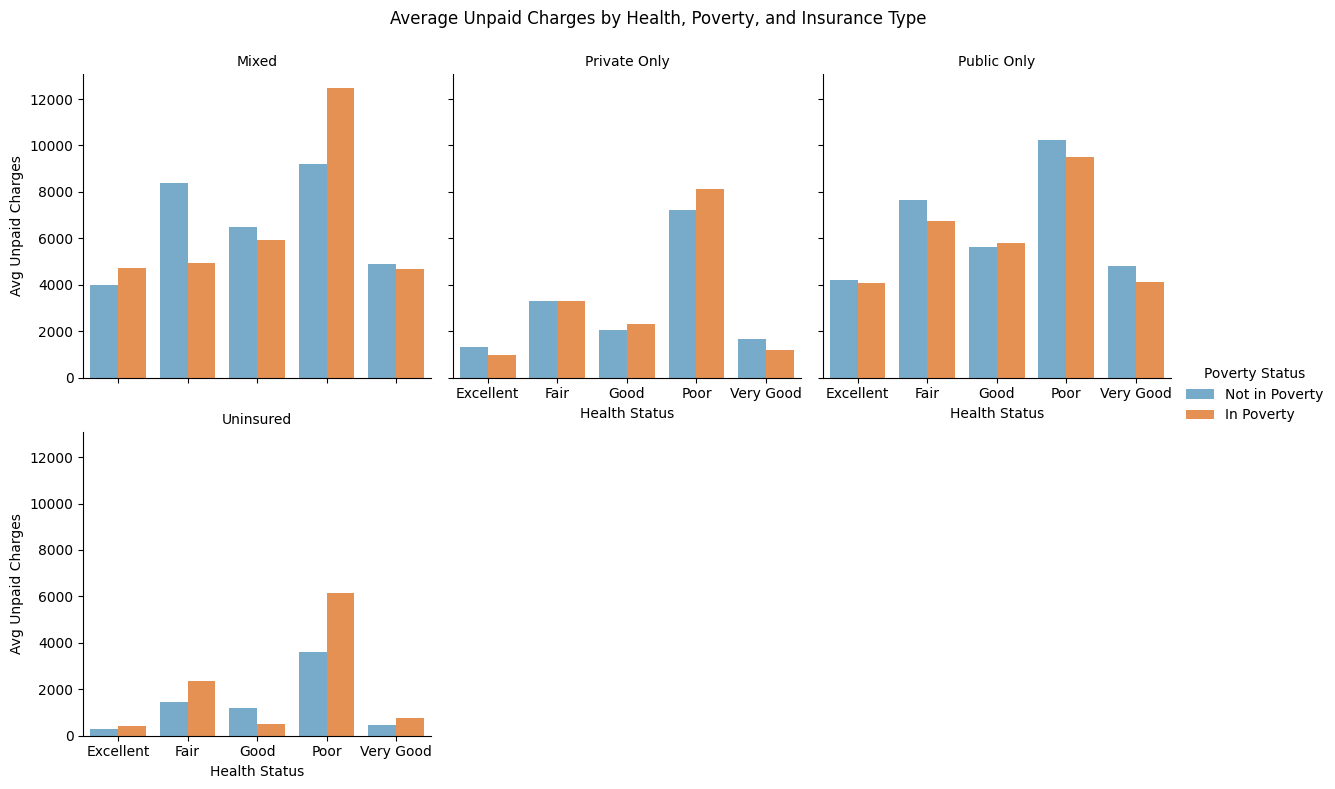

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    trend, 
    col="INSURANCE_TYPE", 
    col_wrap=3, 
    height=4, 
    sharey=True
)
g.map_dataframe(
    sns.barplot, 
    x="HEALTH_LABEL", 
    y="UNPAID_CHARGES", 
    hue="POVERTY_LABEL", 
    palette=['#6baed6', '#fd8d3c']
)
g.set_axis_labels("Health Status", "Avg Unpaid Charges")
g.add_legend(title="Poverty Status")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9,)
g.fig.suptitle("Average Unpaid Charges by Health, Poverty, and Insurance Type")
plt.show()

# Use Case:

1. User enters their info (age, income, health, etc.)
2. 
System predicts (using your model or summary stats):3. 
Expected unpaid charges for each insurance typ4. e
Likelihood of reporting good health for each insurance ty5. pe
System recommends the insurance type(s) th6. at:
Minimize financial risk (low unpaid char7. ges)
Maximize health outcomes (higher probability of good he8. alth)
Fit the user’s eligibility (e.g., Medicaid for low income, private for higher 



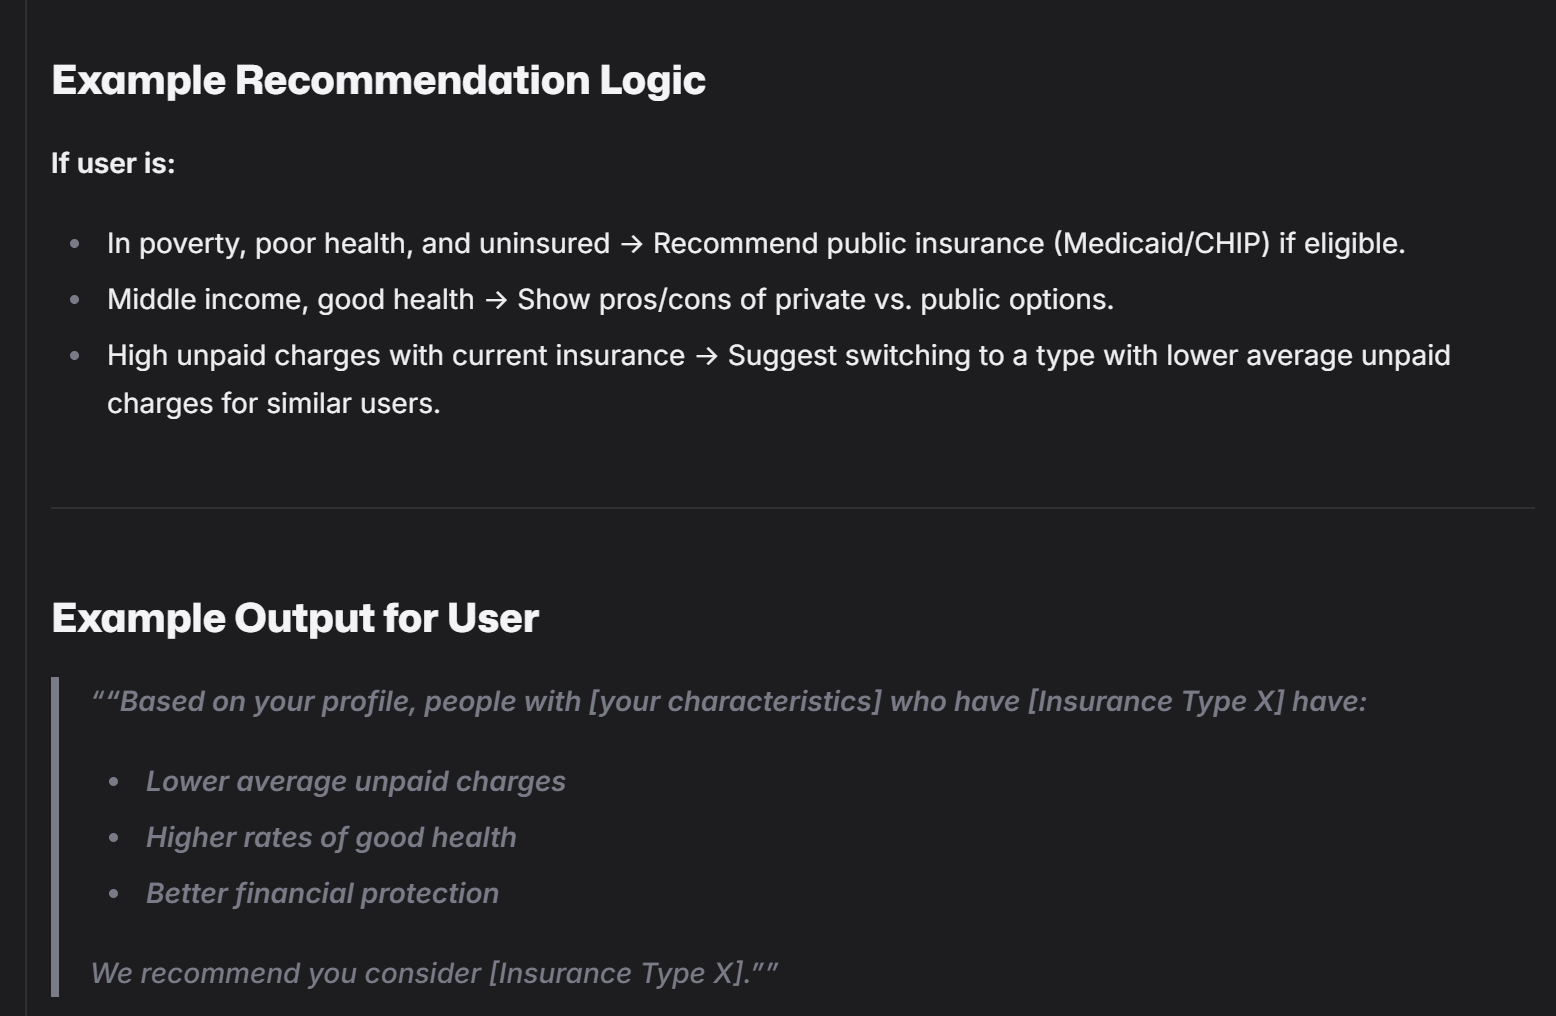income)

# Out-of-Pocket Feature 

In [34]:
# OOP Burden as a % of Income
cleaned_df['OOP_BURDEN'] = cleaned_df['OPEXPTOT'] / cleaned_df['FTOTVAL']
# #Catastrophic Health Spending Flag
# Definition: OOP burden > 10% (or 20%) of income is often considered “catastrophic.”
cleaned_df['CATASTROPHIC_OOP'] = (cleaned_df['OOP_BURDEN'] > 0.1).astype(int)
# OOP to Total Charges Ratio
cleaned_df['OOP_TO_CHARGES'] = cleaned_df['OPEXPTOT'] / cleaned_df['CHGTOT']

cleaned_df['POVERTY_LABEL'] = cleaned_df['IS_POVERTY'].map({0: 'Not in Poverty', 1: 'In Poverty'})

C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\820541877.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


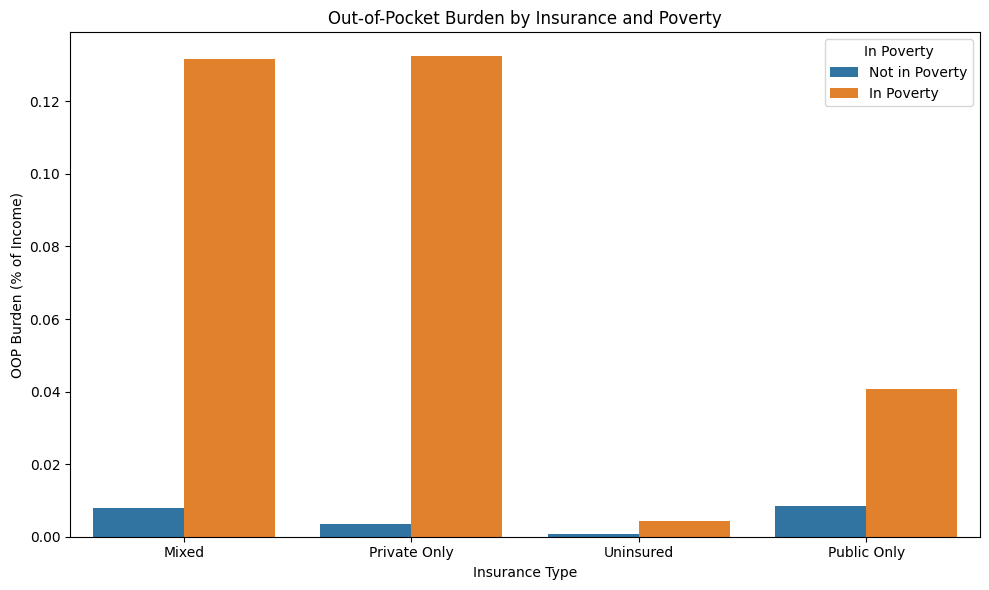

In [35]:
# OOP Burden by Insurance and Poverty
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=cleaned_df,
    x='INSURANCE_TYPE',
    y='OOP_BURDEN',
    hue='POVERTY_LABEL',
    ci=None
)
plt.ylabel('OOP Burden (% of Income)')
plt.xlabel('Insurance Type')
plt.title('Out-of-Pocket Burden by Insurance and Poverty')
plt.legend(title='In Poverty')
plt.tight_layout()
plt.show()

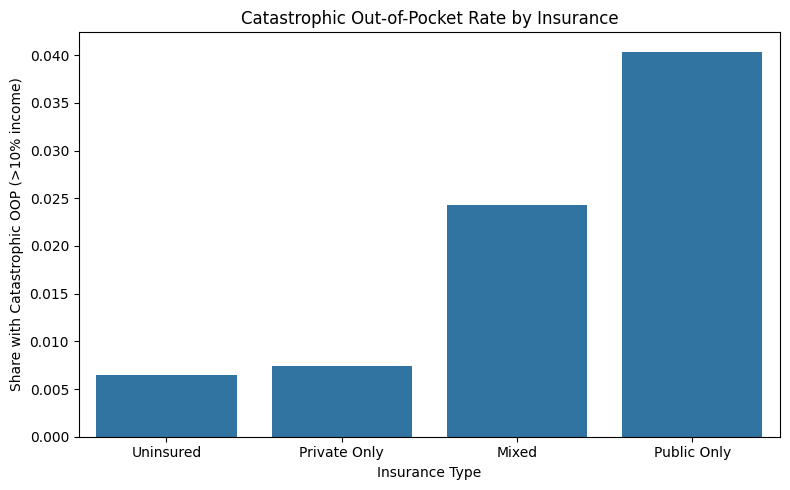

In [36]:
# Catastrophic OOP Rate by Insurance
cat_oop_rate = cleaned_df.groupby('INSURANCE_TYPE')['CATASTROPHIC_OOP'].mean().reset_index().sort_values('CATASTROPHIC_OOP')
plt.figure(figsize=(8,5))
sns.barplot(data=cat_oop_rate, x='INSURANCE_TYPE', y='CATASTROPHIC_OOP')
plt.ylabel('Share with Catastrophic OOP (>10% income)')
plt.xlabel('Insurance Type')
plt.title('Catastrophic Out-of-Pocket Rate by Insurance')
plt.tight_layout()
plt.show()

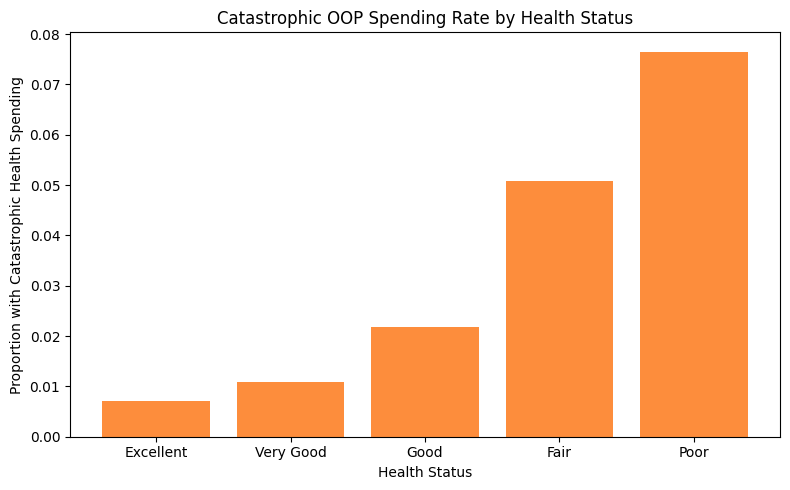

In [37]:
# Calculate the proportion of catastrophic spenders in each health group
trend = (
    cleaned_df
    .groupby('HEALTH_LABEL')['CATASTROPHIC_OOP']
    .mean()
    .reset_index()
)

# Sort by catastrophic spending rate
trend_sorted = trend.sort_values('CATASTROPHIC_OOP')

plt.figure(figsize=(8,5))
plt.bar(trend_sorted['HEALTH_LABEL'], trend_sorted['CATASTROPHIC_OOP'], color='#fd8d3c')
plt.ylabel('Proportion with Catastrophic Health Spending')
plt.xlabel('Health Status')
plt.title('Catastrophic OOP Spending Rate by Health Status')
plt.tight_layout()
plt.show()

calculate the Catastrophic Health Spending Flag for a new user after they input their data (for example, in a web form or app):

1. What You Need from the User
Annual family income (e.g., user_income)
Annual out-of-pocket health spending (e.g., user_


2. Calculation Logic
OOP Burden
=
Out-of-Pocket Spending
Family Income
OOP Burden= 
Family Income
Out-of-Pocket Spending
​
 
If OOP Burden > 0.10 (10%), then Catastrophic Health Spending Flag = 1
Otherwise, Flag = 0

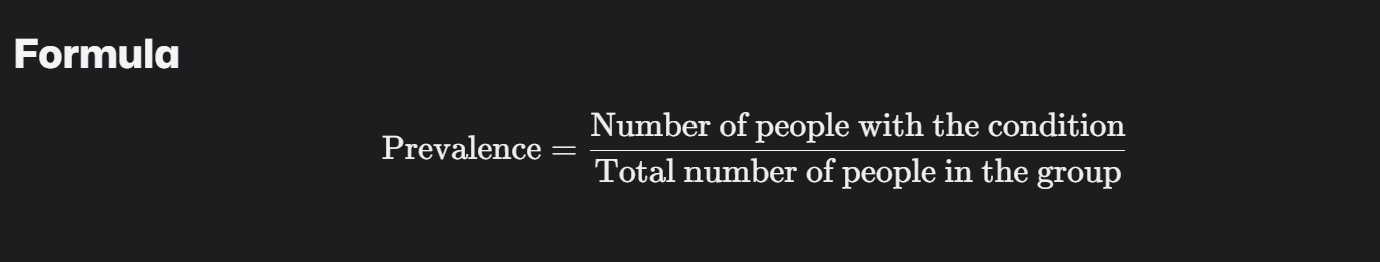

Prevalence tells you how common a condition is in a specific group at a specific time.
It’s a snapshot of disease or risk in your population.

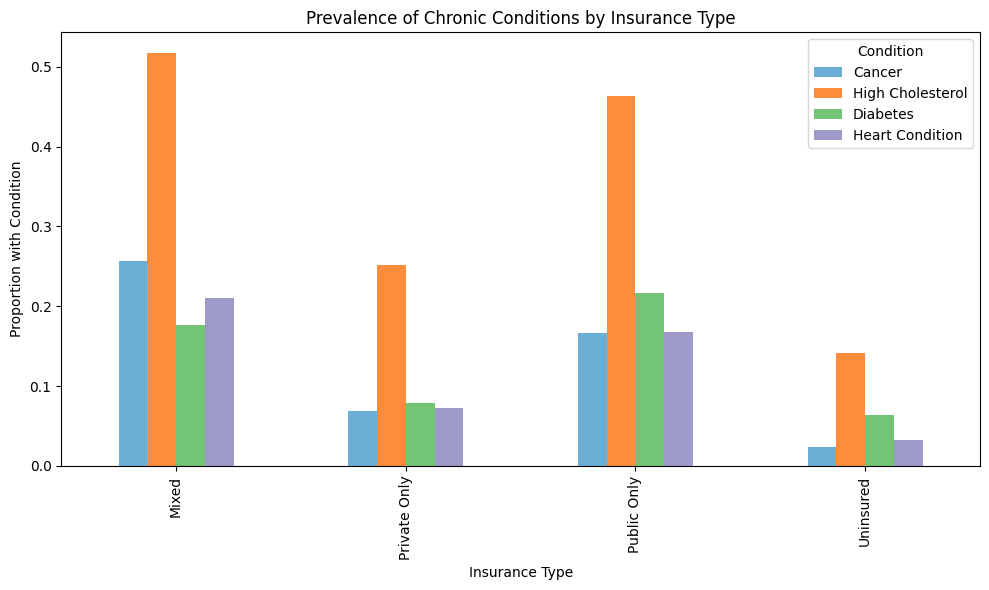

                CANCEREV  CHOLHIGHEV  DIABETICEV  HEARTCONEV
INSURANCE_TYPE                                              
Mixed           0.256420    0.517350    0.176632    0.209861
Private Only    0.069324    0.251683    0.078778    0.072046
Public Only     0.166786    0.463166    0.216769    0.168307
Uninsured       0.023859    0.141435    0.063337    0.032784


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Map insurance type and chronic condition values to readable labels ---

# insurance_labels = {
#     1: "Private",
#     2: "Medicaid/Public",
#     3: "Other",
#     4: "Uninsured",
#     5: "Don't know"
# }
value_labels = {
    0: "NIU",
    1: "No",
    2: "Yes",
    7: "Unknown-refused",
    8: "Unknown-not ascertained",
    9: "Unknown-don't know"
}

# cleaned_df['INSURANCE_LABEL'] = cleaned_df['COVERTYPE'].map(insurance_labels)

# --- 2. Calculate the prevalence of "Yes" for each condition by insurance type ---

def get_prevalence(df, col):
    return (
        df[df[col] == 2]
        .groupby('INSURANCE_TYPE')
        .size()
        .div(df.groupby('INSURANCE_TYPE').size())
        .rename(col)
    )

prevalence_df = pd.concat([
    get_prevalence(cleaned_df, 'CANCEREV'),
    get_prevalence(cleaned_df, 'CHOLHIGHEV'),
    get_prevalence(cleaned_df, 'DIABETICEV'),
    get_prevalence(cleaned_df, 'HEARTCONEV')
], axis=1).reset_index()

# --- 3. Visualization: Bar plot for all conditions by insurance type ---

prevalence_df = prevalence_df.set_index('INSURANCE_TYPE')
# prevalence_df = prevalence_df.loc[insurance_labels.values()]  # Ensure order

prevalence_df.plot(
    kind='bar',
    figsize=(10,6),
    color=['#6baed6', '#fd8d3c', '#74c476', '#9e9ac8']
)
plt.ylabel('Proportion with Condition')
plt.xlabel('Insurance Type')
plt.title('Prevalence of Chronic Conditions by Insurance Type')
# plt.ylim(0, 1)
plt.legend(['Cancer', 'High Cholesterol', 'Diabetes', 'Heart Condition'], title='Condition')
plt.tight_layout()
plt.show()

# --- 4. Show the prevalence table ---

print(prevalence_df)

In [39]:
print(cleaned_df.columns.tolist())


['YEAR', 'PERNUM', 'DUID', 'PID', 'MEPSID', 'PANEL', 'PSUANN', 'STRATANN', 'PSUPLD', 'STRATAPLD', 'PANELYR', 'RELYR', 'PERWEIGHT', 'SAQWEIGHT', 'DIABWEIGHT', 'FAMIDYR', 'CPSFAMID', 'SEX', 'MARSTAT', 'BIRTHMO', 'BIRTHYR', 'REGIONMEPS', 'RELATE', 'FAMSIZE', 'INCTOT', 'FTOTVAL', 'FOODSTMO', 'POVCAT', 'POVCATCPS', 'POVCATMEPS', 'HEALTH', 'HINOTCOV', 'HIPRIVATE', 'HICHAMPANY', 'HIMACHIP', 'HIMCARE', 'HIOTHGOV', 'HIOTHGOVHMO', 'HIOTHGOVPREM', 'HIVA', 'COVERTYPE', 'COVTYPEAGE', 'CANCEREV', 'CHOLHIGHEV', 'DIABETICEV', 'HEARTCONEV', 'HYPERTENAGE', 'EXPTOT', 'CHGTOT', 'OPEXPTOT', 'OPCHGTOT', 'new_age', 'HEALTH_LABEL', 'CHGTOT_bin', 'FAMILY_INCOME_GROUP', 'INCOME_GROUP', 'INSURANCE_TYPE', 'AGE_GROUP', 'IS_POVERTY', 'UNPAID_CHARGES', 'OOP_BURDEN', 'CATASTROPHIC_OOP', 'OOP_TO_CHARGES', 'POVERTY_LABEL']


In [40]:
cleaned_df['OOP_BURDEN'].head()

0    0.0
1    0.0
2    0.0
3    0.0
8    0.0
Name: OOP_BURDEN, dtype: float64

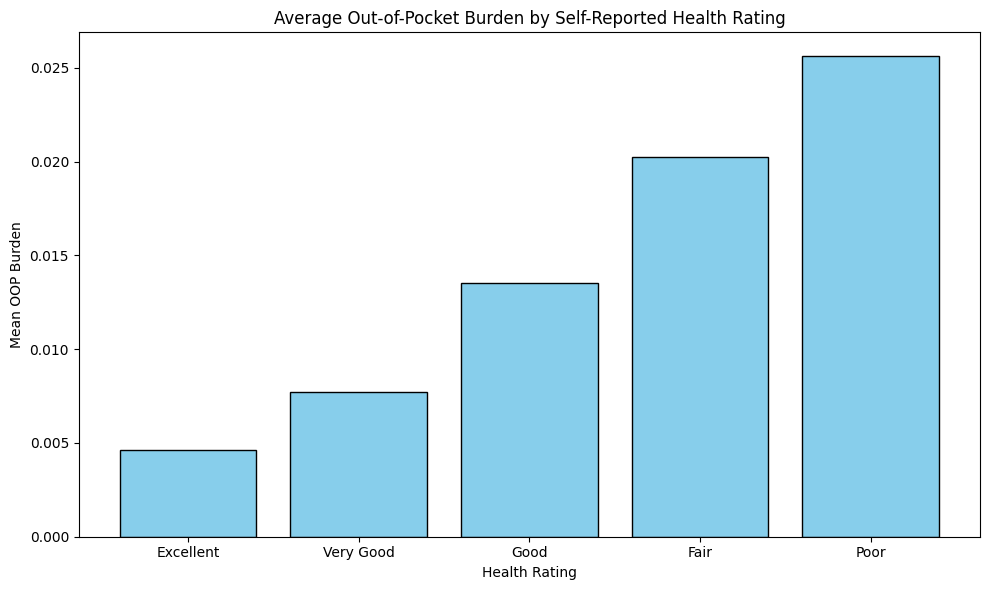

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Replace inf values with NaN
cleaned_df = cleaned_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with missing values in OOP_BURDEN or HEALTH_LABEL
filtered_df = cleaned_df.dropna(subset=['OOP_BURDEN', 'HEALTH_LABEL'])

# Define health label order
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Calculate means manually
x_labels = []
y_values = []

for health in health_order:
    subset = filtered_df[filtered_df['HEALTH_LABEL'] == health]
    x_labels.append(health)
    y_values.append(subset['OOP_BURDEN'].mean())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color='skyblue', edgecolor='black')
plt.title('Average Out-of-Pocket Burden by Self-Reported Health Rating')
plt.xlabel('Health Rating')
plt.ylabel('Mean OOP Burden')
plt.tight_layout()
plt.show()



In [42]:
cleaned_df.columns

Index(['YEAR', 'PERNUM', 'DUID', 'PID', 'MEPSID', 'PANEL', 'PSUANN',
       'STRATANN', 'PSUPLD', 'STRATAPLD', 'PANELYR', 'RELYR', 'PERWEIGHT',
       'SAQWEIGHT', 'DIABWEIGHT', 'FAMIDYR', 'CPSFAMID', 'SEX', 'MARSTAT',
       'BIRTHMO', 'BIRTHYR', 'REGIONMEPS', 'RELATE', 'FAMSIZE', 'INCTOT',
       'FTOTVAL', 'FOODSTMO', 'POVCAT', 'POVCATCPS', 'POVCATMEPS', 'HEALTH',
       'HINOTCOV', 'HIPRIVATE', 'HICHAMPANY', 'HIMACHIP', 'HIMCARE',
       'HIOTHGOV', 'HIOTHGOVHMO', 'HIOTHGOVPREM', 'HIVA', 'COVERTYPE',
       'COVTYPEAGE', 'CANCEREV', 'CHOLHIGHEV', 'DIABETICEV', 'HEARTCONEV',
       'HYPERTENAGE', 'EXPTOT', 'CHGTOT', 'OPEXPTOT', 'OPCHGTOT', 'new_age',
       'HEALTH_LABEL', 'CHGTOT_bin', 'FAMILY_INCOME_GROUP', 'INCOME_GROUP',
       'INSURANCE_TYPE', 'AGE_GROUP', 'IS_POVERTY', 'UNPAID_CHARGES',
       'OOP_BURDEN', 'CATASTROPHIC_OOP', 'OOP_TO_CHARGES', 'POVERTY_LABEL'],
      dtype='object')

'YEAR', 'PERNUM', 'DUID', 'PID', 'MEPSID', 'PANEL', 'PSUANN',
       'STRATANN', 'PSUPLD', 'STRATAPLD', 'PANELYR', 'RELYR', 'PERWEIGHT',
       'SAQWEIGHT', 'DIABWEIGHT', 'FAMIDYR', 'CPSFAMID','BIRTHMO', 'BIRTHYR', 'REGIONMEPS', 'RELATE', 'FAMSIZE','INCTOT','FTOTVAL','FOODSTMO', 'POVCAT', 'POVCATCPS', 'POVCATMEPS','HINOTCOV','HIPRIVATE', 'HICHAMPANY', 'HIMACHIP', 'HIMCARE','HIOTHGOV', 'HIOTHGOVHMO', 'HIOTHGOVPREM',
       'HIVA', 'COVERTYPE','COVTYPEAGE',

 Drop (with reason)

    All ID columns: YEAR, PERNUM, DUID, PID, MEPSID, etc.

    Sampling/weighting: PERWEIGHT, SAQWEIGHT, DIABWEIGHT

    Birth fields: BIRTHYR, BIRTHMO → use AGE instead

    Medical cost/claims data: EXPTOT, CHGTOT, etc. → not user-accessible

    Other engineered health fields: HEALTH, HEALTH_LABEL, CHGTOT_bin, etc.

    Detailed insurance flags: HIPRIVATE, HIMCARE, etc. → use unified INSURANCE_TYPE

    Chronic illness history: optional if we want detailed health profile

In [43]:
cleaned_df.to_csv("cleaned_df.csv",index = False)

In [44]:
selected_features = [
    # Demographics
    "SEX",
    "MARSTAT",
    "FAMSIZE",
    "FTOTVAL",

    # Derived socioeconomic
    "new_age",
    "IS_POVERTY",

    # Insurance (input or output)
    "INSURANCE_TYPE",

    # Disease indicators
    "CANCEREV",  #1:NO 2 yes
    "CHOLHIGHEV", #1:NO 2 ye
    "DIABETICEV", #1:NO 2 ye
    "HEARTCONEV", #1:NO 2,3 yes 
    "HYPERTENAGE"  # 
]


In [45]:
# Convert disease indicators to binary (0 = No, 1 = Yes)
disease_cols = ["CANCEREV", "CHOLHIGHEV", "DIABETICEV", "HEARTCONEV"]

# Apply the transformation
for col in disease_cols:
    cleaned_df[col] = cleaned_df[col].apply(lambda x: 1 if x in [2, 3] else 0)

# Convert HYPERTENAGE to binary: 1 if age > 0, else 0
cleaned_df["HYPERTENAGE"] = cleaned_df["HYPERTENAGE"].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)



In [46]:
# from sklearn.preprocessing import LabelEncoder


# selected_cols = cleaned_df[selected_features]

# # 1 = Married, 0 = Unmarried/Separated (codes: 20=Widowed, 30=Divorced, 40=Separated, 50=Never married)
# selected_cols.loc[:,'MARSTAT'] = selected_cols['MARSTAT'].apply(lambda x: 0 if x in [20, 30, 40, 50] else 1)

# selected_cols.loc[:, 'INSURANCE_TYPE'] = selected_cols['INSURANCE_TYPE'].apply(
#     lambda x: (
#         1 if x == 'Private Only' else
#         2 if x == 'Public Only' else
#         3 if x == 'Uninsured' else 4
#     )
# )

# # Initialize the encoder
# # le = LabelEncoder()

# # # Fit and transform the insurance type column
# # selected_cols.loc[:, 'INSURANCE_TYPE'] = le.fit_transform(selected_cols['INSURANCE_TYPE'])

# # Convert HEALTH to binary target: 1 = Good/Very Good/Excellent, 0 = Fair/Poor
# target_df= cleaned_df['HEALTH'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# # Check class distribution
# print(target_df.value_counts())

from sklearn.preprocessing import LabelEncoder


selected_cols = cleaned_df[selected_features]

# 1 = Married, 0 = Unmarried/Separated (codes: 20=Widowed, 30=Divorced, 40=Separated, 50=Never married)
selected_cols.loc[:,'MARSTAT'] = selected_cols['MARSTAT'].apply(lambda x: 0 if x in [20, 30, 40, 50] else 1)

selected_cols.loc[:, 'INSURANCE_TYPE_ENC'] = selected_cols['INSURANCE_TYPE'].apply(
    lambda x: (
        0 if x == 'Private Only' else
        1 if x == 'Public Only' else
        2 if x == 'Uninsured' else 3
    )
)


# Convert HEALTH to binary target: 1 = Good/Very Good/Excellent, 0 = Fair/Poor
target_df= cleaned_df['HEALTH'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Check class distribution
print(target_df.value_counts())



HEALTH
1    60886
0     9592
Name: count, dtype: int64


C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\696111162.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols.loc[:, 'INSURANCE_TYPE_ENC'] = selected_cols['INSURANCE_TYPE'].apply(


<h3>Visualizing Data Imbalance</h3>

C:\Users\abdul\AppData\Local\Temp\ipykernel_28108\558366134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_df, palette=['red', 'green'])


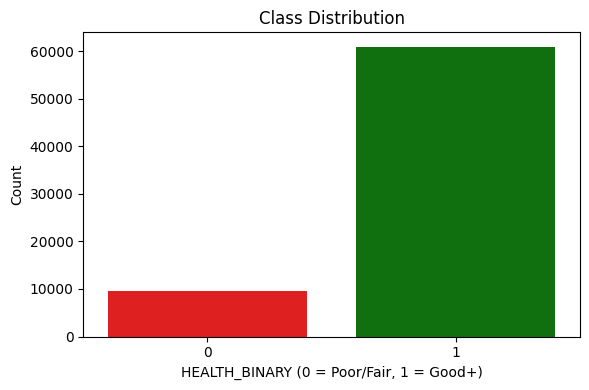

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_df, palette=['red', 'green'])
plt.title('Class Distribution')
plt.xlabel('HEALTH_BINARY (0 = Poor/Fair, 1 = Good+)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Prepare Features and Target

# using different apprach to handle data imbalance

In [48]:
cleaned_df.head()

,YEAR,PERNUM,DUID,PID,MEPSID,PANEL,PSUANN,STRATANN,PSUPLD,STRATAPLD,...,FAMILY_INCOME_GROUP,INCOME_GROUP,INSURANCE_TYPE,AGE_GROUP,IS_POVERTY,UNPAID_CHARGES,OOP_BURDEN,CATASTROPHIC_OOP,OOP_TO_CHARGES,POVERTY_LABEL
0,2018,1,2290001,101,2290001101,22,1,20182035,1,2035,...,Lower-Middle,Lower-Middle,Mixed,18-34,0,-662,0.0,0,0.0,Not in Poverty
1,2018,2,2290001,102,2290001102,22,1,20182035,1,2035,...,Lower-Middle,Low,Private Only,18-34,0,-1114,0.0,0,0.0,Not in Poverty
2,2018,1,2290002,101,2290002101,22,2,20182048,2,2048,...,Upper-Middle,Lower-Middle,Private Only,18-34,0,89,0.0,0,0.0,Not in Poverty
3,2018,2,2290002,102,2290002102,22,2,20182048,2,2048,...,Upper-Middle,Lower-Middle,Private Only,35-49,0,0,0.0,0,NaN,Not in Poverty
8,2018,1,2290003,101,2290003101,22,2,20182002,2,2002,...,High,Lower-Middle,Private Only,35-49,0,359,0.0,0,0.0,Not in Poverty


In [49]:
features = ['SEX', 'MARSTAT', 'FAMSIZE', 'FTOTVAL', 'new_age', 'IS_POVERTY',
            'INSURANCE_TYPE', 'CANCEREV', 'CHOLHIGHEV', 'DIABETICEV',
            'HEARTCONEV', 'HYPERTENAGE']



In [50]:
# delete this later
from sklearn.utils import resample

cleaned_df_copy = cleaned_df.copy()
cleaned_df_copy = cleaned_df_copy.drop(["HEALTH"],axis=1)
cleaned_df_copy['HEALTH'] = target_df

majority = cleaned_df_copy[cleaned_df_copy["HEALTH"] == 1]
minority = cleaned_df_copy[cleaned_df_copy["HEALTH"] == 0]


# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,            # sample without replacement
    n_samples=len(minority),  # match minority count
    random_state=42
)

# Combine minority and downsampled majority
cleaned_df_copy = pd.concat([minority, majority_downsampled])




# Shuffle the dataset
cleaned_df_copy = cleaned_df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop from balanced_df INSURANCE_TYPE
# cleaned_df_copy = balanced_df.drop(columns=['INSURANCE_TYPE'], errors='ignore')

# Split features and target again
X_balanced = cleaned_df_copy.drop(columns=['HEALTH'])
y_balanced = cleaned_df_copy['HEALTH']

print(y_balanced.value_counts())


HEALTH
0    9592
1    9592
Name: count, dtype: int64


In [51]:
from sklearn.utils import resample

# Combine features and target into one DataFrame
combined_df = pd.concat([selected_cols, target_df.rename("HEALTH")], axis=1)

# Separate majority and minority classes
majority = combined_df[combined_df["HEALTH"] == 1]
minority = combined_df[combined_df["HEALTH"] == 0]


# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,            # sample without replacement
    n_samples=len(minority),  # match minority count
    random_state=42
)

# Combine minority and downsampled majority
balanced_df = pd.concat([minority, majority_downsampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop from balanced_df INSURANCE_TYPE
balanced_df = balanced_df.drop(columns=['INSURANCE_TYPE'], errors='ignore')

# Split features and target again
X_balanced = balanced_df.drop(columns=['HEALTH'])
y_balanced = balanced_df['HEALTH']

print(y_balanced.value_counts())



HEALTH
0    9592
1    9592
Name: count, dtype: int64


In [52]:
cleaned_df.to_csv('cleaned_df.csv')

In [53]:
X_balanced.head()

,SEX,MARSTAT,FAMSIZE,FTOTVAL,new_age,IS_POVERTY,CANCEREV,CHOLHIGHEV,DIABETICEV,HEARTCONEV,HYPERTENAGE,INSURANCE_TYPE_ENC
0,2,1,3,13221,34,0,0,0,0,0,1,2
1,1,1,2,80130,85,0,1,1,0,0,1,3
2,1,1,4,278026,41,0,1,1,0,0,1,0
3,2,1,8,52557,61,0,0,0,1,0,1,2
4,1,1,4,48525,57,0,0,0,0,0,1,1


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_balanced[['FTOTVAL', 'new_age']] = scaler.fit_transform(X_balanced[['FTOTVAL', 'new_age']])


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = X_balanced
y = y_balanced

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1919
           1       0.69      0.68      0.69      1918

    accuracy                           0.69      3837
   macro avg       0.69      0.69      0.69      3837
weighted avg       0.69      0.69      0.69      3837



In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'n_estimators': 100}


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Use the best parameters
model = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1919
           1       0.70      0.72      0.71      1918

    accuracy                           0.71      3837
   macro avg       0.71      0.71      0.71      3837
weighted avg       0.71      0.71      0.71      3837



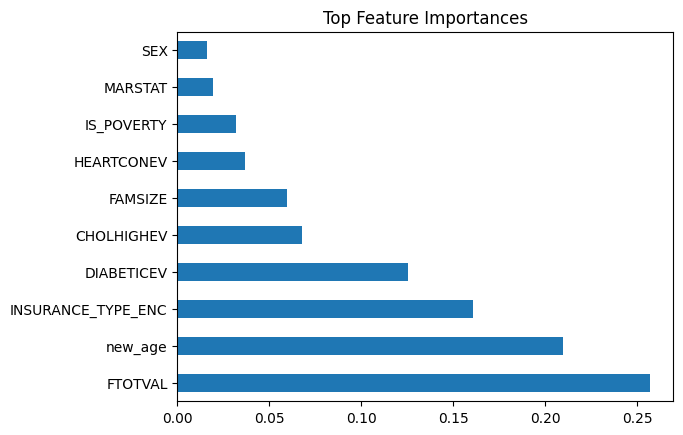

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()


In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)



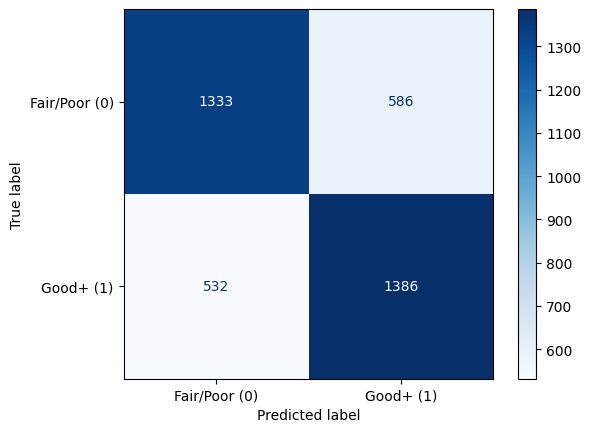

In [60]:
# Display the matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fair/Poor (0)", "Good+ (1)"])
disp.plot(cmap='Blues')


In [61]:
X_train.shape

(15347, 12)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import ADASYN
import pandas as pd

# Assume you already have:
# X_selected -> selected features based on PCA
# y_binary -> HEALTH_BINARY column
# cleaned_df -> the full preprocessed dataset

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 Classification Report: {name}")
    print(classification_report(y_test, y_pred, target_names=['Fair/Poor (0)', 'Good+ (1)']))
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }



📌 Classification Report: Logistic Regression
               precision    recall  f1-score   support

Fair/Poor (0)       0.69      0.66      0.68      1919
    Good+ (1)       0.68      0.70      0.69      1918

     accuracy                           0.68      3837
    macro avg       0.68      0.68      0.68      3837
 weighted avg       0.68      0.68      0.68      3837


📌 Classification Report: Decision Tree
               precision    recall  f1-score   support

Fair/Poor (0)       0.62      0.61      0.62      1919
    Good+ (1)       0.62      0.63      0.63      1918

     accuracy                           0.62      3837
    macro avg       0.62      0.62      0.62      3837
 weighted avg       0.62      0.62      0.62      3837


📌 Classification Report: Naive Bayes
               precision    recall  f1-score   support

Fair/Poor (0)       0.83      0.11      0.20      1919
    Good+ (1)       0.52      0.98      0.68      1918

     accuracy                           0.5

c:\Users\abdul\Desktop\Arqam's Project\machinelearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:44:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 Classification Report: AdaBoost
               precision    recall  f1-score   support

Fair/Poor (0)       0.70      0.68      0.69      1919
    Good+ (1)       0.69      0.71      0.70      1918

     accuracy                           0.69      3837
    macro avg       0.70      0.69      0.69      3837
 weighted avg       0.70      0.69      0.69      3837



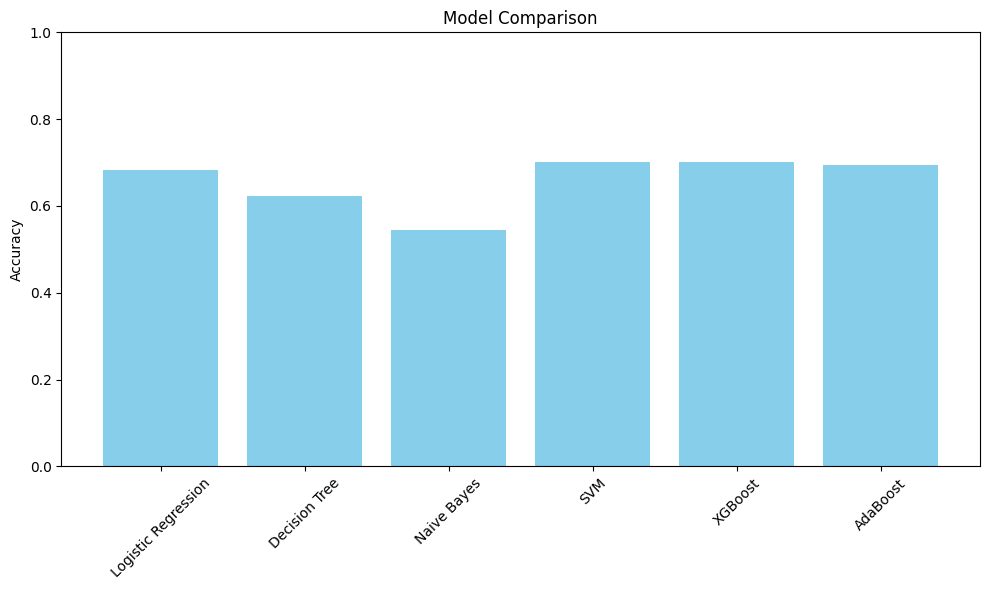

In [63]:
import matplotlib.pyplot as plt

# Accuracy bar chart
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Choose model (replace with your model)
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform 5-fold cross-validation
scores = {}
for metric_name, scorer in scoring.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    scores[metric_name] = (cv_scores.mean(), cv_scores.std())

# Print the results
print("Cross-Validation Results (5-fold):")
for metric, (mean, std) in scores.items():
    print(f"{metric.capitalize():<10}: {mean:.4f} ± {std:.4f}")


Cross-Validation Results (5-fold):
Accuracy  : 0.7070 ± 0.0096
Precision : 0.7048 ± 0.0107
Recall    : 0.7127 ± 0.0096
F1        : 0.7087 ± 0.0091


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Create the classifier
xg =XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 3. Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_weighted',
                           n_jobs=-1,
                           verbose=2)

# 4. Fit the model on the training set
grid_search.fit(X_train, y_train)

# 5. Print best parameters
print("✅ Best Parameters:", grid_search.best_params_)

# 6. Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fair/Poor (0)', 'Good+ (1)']))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Classification Report:
               precision    recall  f1-score   support

Fair/Poor (0)       0.71      0.68      0.70      1919
    Good+ (1)       0.69      0.72      0.71      1918

     accuracy                           0.70      3837
    macro avg       0.70      0.70      0.70      3837
 weighted avg       0.70      0.70      0.70      3837



c:\Users\abdul\Desktop\Arqam's Project\machinelearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:44:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import pickle
pickle.dump(grid_search,)

NameError: name 'grid_' is not defined

In [ ]:
balanced_df.columns

Index(['SEX', 'MARSTAT', 'FAMSIZE', 'FTOTVAL', 'new_age', 'IS_POVERTY',
       'CANCEREV', 'CHOLHIGHEV', 'DIABETICEV', 'HEARTCONEV', 'HYPERTENAGE',
       'INSURANCE_TYPE_ENC', 'HEALTH'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load your balanced data
df = pd.read_csv("balanced_df.csv")

# Define health mapping (1–3 = Good, 4–5 = Bad)
df['Health_Category'] = df['HEALTH'].apply(lambda x: 'Good' if x in [1, 2, 3] else 'Bad')

# Create age groups
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['Age_Group'] = pd.cut(df['new_age'], bins=bins, labels=labels, right=False)


C:\Users\abdul\AppData\Local\Temp\ipykernel_27984\65805842.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ValueError: cannot convert float NaN to integer

In [ ]:
import pandas as pd
import plotly.express as px

# ===== Step 1 – Load CSV =====
df = pd.read_csv("balanced_df.csv")

insurance_labels = {
    0: "Private",
    1: "Public",
    2: "Uninsured",
    3: "Mixed"
}

df['INSURANCE_LABEL'] = df['INSURANCE_TYPE_ENC'].map(insurance_labels)
# ===== Step 2 – Map HEALTH to Good/Bad =====
# 1, 2, 3 = Good; 4, 5 = Bad
df['Health_Category'] = df['HEALTH'].apply(lambda x: 'Good' if x in [1, 2, 3] else 'Bad')

# ===== Step 3 – Create Age Groups =====
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['Age_Group'] = pd.cut(df['new_age'], bins=bins, labels=labels, right=False)

# ===== Step 4 – Aggregate Counts =====
counts = df.groupby(['INSURANCE_LABEL', 'Age_Group', 'Health_Category']).size().reset_index(name='Count')

# Pivot to have Good & Bad in columns
pivot_df = counts.pivot_table(
    index=['INSURANCE_LABEL', 'Age_Group'],
    columns='Health_Category',
    values='Count',
    fill_value=0
).reset_index()

# ===== Step 5 – Plot grouped bar chart =====
fig = px.bar(
    pivot_df,
    x="Age_Group",
    y=["Good", "Bad"],
    barmode="group",
    color_discrete_map={"Good": "green", "Bad": "red"},
    facet_col="INSURANCE_LABEL",
    title="Good vs Bad Health Ratings by Age Group and Insurance Type"
)

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Number of Patients",
    plot_bgcolor="white",
    legend_title="Health Category"
)





# ===== Step 6 – Show chart =====
try:
    fig.show()  # Works in Jupyter
except:
    # Save as HTML if running outside Jupyter
    fig.write_html("good_vs_bad_health.html")
    print("Chart saved as good_vs_bad_health.html")


C:\Users\abdul\AppData\Local\Temp\ipykernel_27984\2650877993.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\abdul\AppData\Local\Temp\ipykernel_27984\2650877993.py:28: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [70]:
import pickle

In [71]:
filename = 'my_trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(grid_search, file) # 'model' refers to your trained machine learning model object